<a href="https://colab.research.google.com/github/clferreira1985/Projetos_Python/blob/main/Machine_Learning/MVP_Hotel_Reservations_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prevendo cancelamentos de hotéis

## 1º Problema de Negócio

Identificar como se encontra a empresa, entender a taxa de cancelamento e prevê a intenção de compra do consumidor com a maquina preditiva que melhor se performar.



### Os dados

###### Eles forneceram a você os dados de suas reservas em um arquivo chamado hotel_bookings.csv, que contém o seguinte:

###### Coluna ---> Descrição
###### Booking_ID ---> Identificador único da reserva.
###### no_of_adults ---> O número de adultos.
###### no_of_children ---> O número de filhos.
###### no_of_weekend_nights ---> Número de noites de fim de semana (sábado ou domingo).
###### no_of_week_nights ---> Número de noites da semana (segunda a sexta).
###### type_of_meal_plan ---> Tipo de plano de refeições incluído na reserva.
###### required_car_parking_space ---> Se é necessário um espaço de estacionamento.
###### room_type_reserved ---> O tipo de quarto reservado.
###### lead_time ---> Número de dias antes da data de chegada em que a reserva foi feita.
###### arrival_year ---> Ano de chegada.
###### arrival_month ---> Mês de chegada.
###### arrival_date ---> Data do mês de chegada.
###### market_segment_type ---> Como foi feita a reserva.
###### repeated_guest ---> Se o hóspede já se hospedou anteriormente no hotel.
###### no_of_previous_cancellations ---> Número de cancelamentos anteriores.
###### no_of_previous_bookings_not_canceled ---> Número de reservas anteriores que foram canceladas.
###### avg_price_per_room ---> Preço médio por dia da reserva.
###### no_of_special_requests ---> Contagem de pedidos especiais feitos como parte da reserva.
###### booking_status ---> Se a reserva foi cancelada ou não.

## 2º Análise Exploratória

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')



In [ ]:
# Carrega o dataset
df = pd.read_csv('https://raw.githubusercontent.com/clferreira1985/Projetos_Python/main/Hotel_Reservations_Dataset/Hotel%20Reservations.csv')


In [ ]:
# Shape
df.shape

(36275, 19)

In [ ]:
#Amostra
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
# Temos valores nulos?
df.isna().any()

Booking_ID                              False
no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
type_of_meal_plan                       False
required_car_parking_space              False
room_type_reserved                      False
lead_time                               False
arrival_year                            False
arrival_month                           False
arrival_date                            False
market_segment_type                     False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                      False
no_of_special_requests                  False
booking_status                          False
dtype: bool

In [ ]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

#### Visualizando as Variáveis Categóricas

In [ ]:
df.select_dtypes(include='object').drop(columns = 'Booking_ID').head()

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
1,Not Selected,Room_Type 1,Online,Not_Canceled
2,Meal Plan 1,Room_Type 1,Online,Canceled
3,Meal Plan 1,Room_Type 1,Online,Canceled
4,Not Selected,Room_Type 1,Online,Canceled


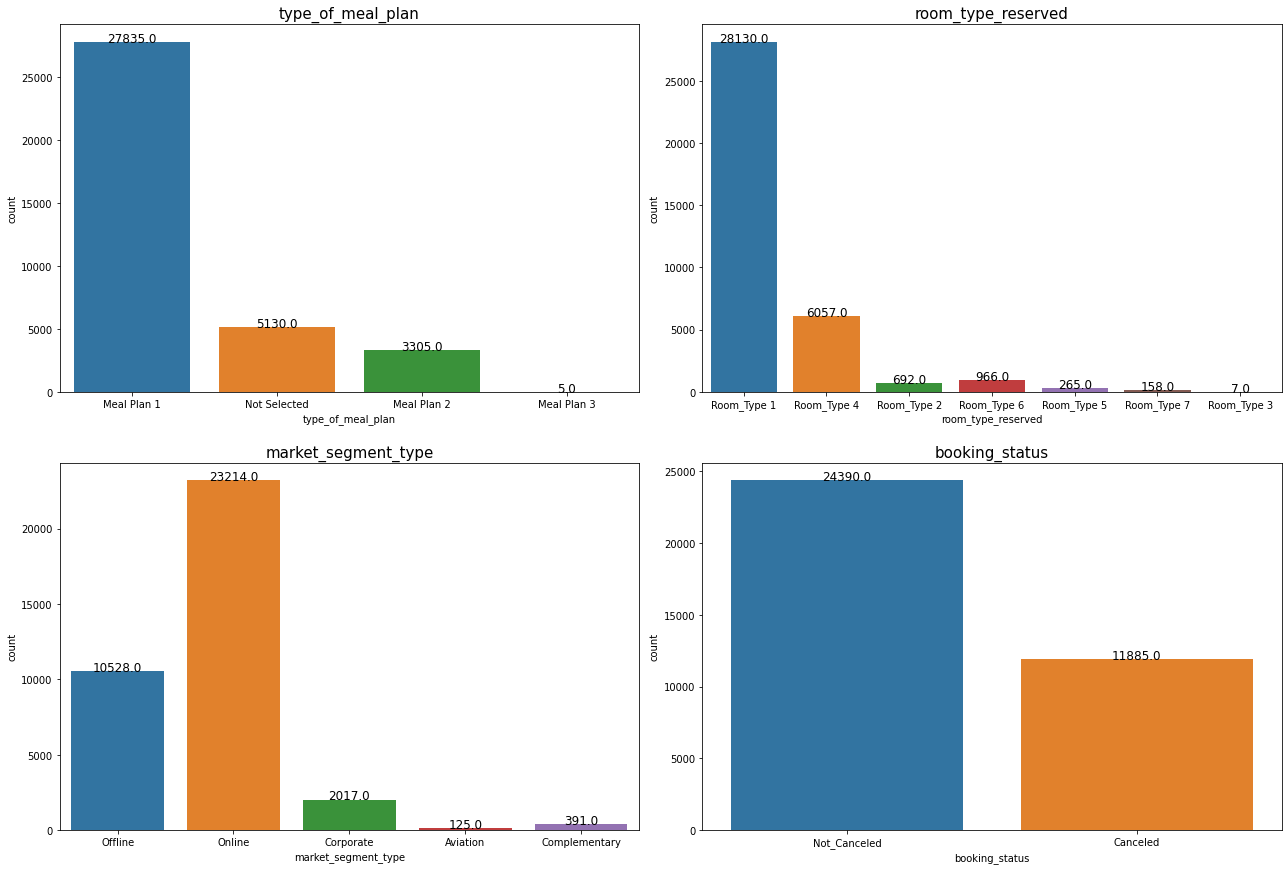

In [ ]:
# plot

# Tamanho da figuta
plt.figure(figsize = (18,30))

# Lista de colunas
columns_list = df.select_dtypes(include='object').drop(columns = 'Booking_ID').head()

# Contador
A = 0

for i in columns_list:
  A += 1
  plt.subplot (5, 2, A)
  ax = sns.countplot(data = df.fillna('NaN'), x = i)
  plt.title(i, fontsize = 15)
  for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
  if A >= 7:
    plt.xticks (rotation = 45)

# Layout

plt.tight_layout(h_pad = 2)

#### Visualizando as Variáveis numericas

In [ ]:
df.head(2)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled


In [ ]:
df['arrival_month'].unique()

array([10, 11,  2,  5,  4,  9, 12,  7,  6,  8,  3,  1])

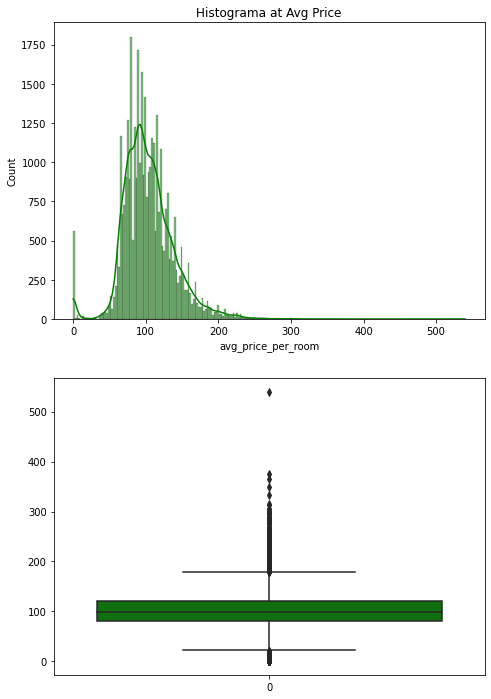

In [ ]:
# plot

# Tamanho da figura

plt.figure(figsize = (17, 12))

# subplot com histogramas

plt.subplot(221)
sns.color_palette('hls', 8)
sns.histplot(df['avg_price_per_room'], kde = True, color = "green")
plt.title("Histograma at Avg Price")

plt.subplot(223)
sns.boxplot(df['avg_price_per_room'], color = "green")

plt.show()

In [ ]:
y = df.arrival_month.value_counts()
y = y.sort_index()

print(y)

1     1014
2     1704
3     2358
4     2736
5     2598
6     3203
7     2920
8     3813
9     4611
10    5317
11    2980
12    3021
Name: arrival_month, dtype: int64


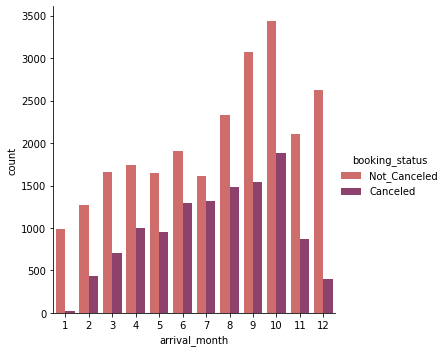

In [ ]:
#plot

sns.catplot(data=df, x='arrival_month', kind='count', palette = "flare", hue='booking_status')
plt.show()

<Axes: xlabel='arrival_year'>

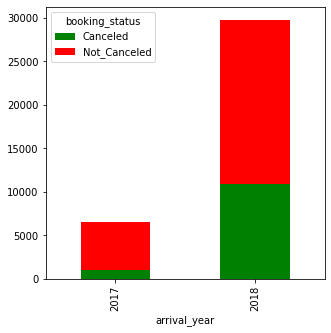

In [ ]:
pd.crosstab(df["arrival_year"], df['booking_status']).plot(kind='bar',
                                                          stacked = True,
                                                         figsize = (5, 5),
                                                         color = ['green','red'])

#### Fazendo ultimas analises com groupby


In [ ]:
df.head(1)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.0,0,Not_Canceled


In [ ]:
# taxa de cancelamento

c=df["booking_status"].value_counts()
d=c.sum()
c*100/d

Not_Canceled    67.236389
Canceled        32.763611
Name: booking_status, dtype: float64

In [ ]:

df["repeated_guest"].value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

In [ ]:
# Criei uma coluna para saber se tem criança ou não, 1 para sim e 0 para não
df['have_child'] = np.where(df['no_of_children'] > 0, 1, 0)
df['have_child'].value_counts()

0    33577
1     2698
Name: have_child, dtype: int64

In [ ]:
# taxa de tipo de seguimento

count_seg=df['market_segment_type'].value_counts()
total_seg=count_seg.sum()
count_seg*100/total_seg



Online           63.994487
Offline          29.022743
Corporate         5.560303
Complementary     1.077877
Aviation          0.344590
Name: market_segment_type, dtype: float64

In [ ]:
df.groupby(['arrival_year']).size()

arrival_year
2017     6514
2018    29761
dtype: int64

In [ ]:
df.groupby(['arrival_year', 'booking_status']).size()

arrival_year  booking_status
2017          Canceled            961
              Not_Canceled       5553
2018          Canceled          10924
              Not_Canceled      18837
dtype: int64

In [ ]:
df.groupby(['arrival_year', 'arrival_month', 'booking_status']).size()

arrival_year  arrival_month  booking_status
2017          7              Canceled           243
                             Not_Canceled       120
              8              Canceled           185
                             Not_Canceled       829
              9              Canceled           182
                             Not_Canceled      1467
              10             Canceled           302
                             Not_Canceled      1611
              11             Canceled            27
                             Not_Canceled       620
              12             Canceled            22
                             Not_Canceled       906
2018          1              Canceled            24
                             Not_Canceled       990
              2              Canceled           430
                             Not_Canceled      1274
              3              Canceled           700
                             Not_Canceled      1658
              4     

In [ ]:
df.groupby(['arrival_year', 'booking_status','market_segment_type']).size()

arrival_year  booking_status  market_segment_type
2017          Canceled        Corporate                 43
                              Offline                  415
                              Online                   503
              Not_Canceled    Complementary            139
                              Corporate                455
                              Offline                 2511
                              Online                  2448
2018          Canceled        Aviation                  37
                              Corporate                177
                              Offline                 2738
                              Online                  7972
              Not_Canceled    Aviation                  88
                              Complementary            252
                              Corporate               1342
                              Offline                 4864
                              Online                 12291
dtype:

In [ ]:
df.groupby(['arrival_year','booking_status','market_segment_type']).size()

arrival_year  booking_status  market_segment_type
2017          Canceled        Corporate                 43
                              Offline                  415
                              Online                   503
              Not_Canceled    Complementary            139
                              Corporate                455
                              Offline                 2511
                              Online                  2448
2018          Canceled        Aviation                  37
                              Corporate                177
                              Offline                 2738
                              Online                  7972
              Not_Canceled    Aviation                  88
                              Complementary            252
                              Corporate               1342
                              Offline                 4864
                              Online                 12291
dtype:

In [ ]:
df.groupby(['arrival_year', 'booking_status', 'have_child','market_segment_type']).size()

arrival_year  booking_status  have_child  market_segment_type
2017          Canceled        0           Corporate                 43
                                          Offline                  414
                                          Online                   484
                              1           Offline                    1
                                          Online                    19
              Not_Canceled    0           Complementary            129
                                          Corporate                453
                                          Offline                 2456
                                          Online                  2268
                              1           Complementary             10
                                          Corporate                  2
                                          Offline                   55
                                          Online                   180
2018          C

In [ ]:
df.groupby(['arrival_year', 'booking_status', 'have_child']).size()

arrival_year  booking_status  have_child
2017          Canceled        0               941
                              1                20
              Not_Canceled    0              5306
                              1               247
2018          Canceled        0              9941
                              1               983
              Not_Canceled    0             17389
                              1              1448
dtype: int64

### **Resumo**

Verificamos que vêm tendo uma aumento significativo de nossas vendas de 2017 para 2018, saimos de 6514 para 29761, isso representa um aumento de 356,88%. As vendas se concentram no tipo online e offline com 93,01%.

Temos uma taxa de cancelamento total de 32,76%, sendo que a maior taxa de cancelamento se encontram no ano de 2018 entre o período de Junho a Outubro. Embora se tenha uma margem o canal coorporativo muito pequena, é onde temos a menor taxa de cancelamento.





## 3º Pré-processamento dos dados


#### Encode Classes

 - Transformando o Target e variáveis categóricas em variável numérica para melhorar a performance do algoritmo


In [ ]:
def meal_plan (row):
    if row.type_of_meal_plan == 'Not Selected':
        return 0
    elif row.type_of_meal_plan == 'Meal Plan 1':
        return 1
    elif row.type_of_meal_plan == 'Meal Plan 2':
        return 2
    else:
        return 3

df['type_of_meal_plan'] = df.apply(meal_plan, axis=1)
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,have_child
0,INN00001,2,0,1,2,1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,0
1,INN00002,2,0,2,3,0,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,0
2,INN00003,1,0,2,1,1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,0
3,INN00004,2,0,0,2,1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,0
4,INN00005,2,0,1,1,0,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,0


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['market_segment_type'] = label_encoder.fit_transform(df['market_segment_type'])
df['market_segment_type'].value_counts()




4    23214
3    10528
2     2017
1      391
0      125
Name: market_segment_type, dtype: int64

In [ ]:
df['booking_status'] = label_encoder.fit_transform(df['booking_status'])
df['booking_status'].value_counts()



1    24390
0    11885
Name: booking_status, dtype: int64

In [ ]:
df['room_type_reserved'] = label_encoder.fit_transform(df['room_type_reserved'])
df['room_type_reserved'].value_counts()

0    28130
3     6057
5      966
1      692
4      265
6      158
2        7
Name: room_type_reserved, dtype: int64

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,have_child
0,INN00001,2,0,1,2,1,0,0,224,2017,10,2,3,0,0,0,65.00,0,1,0
1,INN00002,2,0,2,3,0,0,0,5,2018,11,6,4,0,0,0,106.68,1,1,0
2,INN00003,1,0,2,1,1,0,0,1,2018,2,28,4,0,0,0,60.00,0,0,0
3,INN00004,2,0,0,2,1,0,0,211,2018,5,20,4,0,0,0,100.00,0,0,0
4,INN00005,2,0,1,1,0,0,0,48,2018,4,11,4,0,0,0,94.50,0,0,0


#### Separando os dados entre Treino e Teste de forma interativa

In [ ]:
X = df.drop(labels = ['booking_status','Booking_ID'], axis=1)
y = df.iloc[:,18]

<Axes: xlabel='booking_status', ylabel='count'>

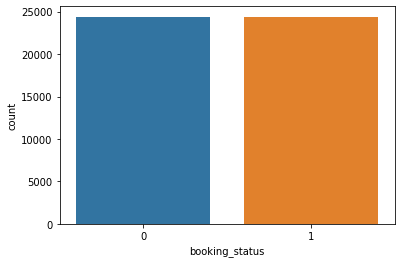

In [ ]:
# Rebalanceamento dos dados
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)
sns.countplot(x=y, data=df)

In [ ]:
# Divisão em Dados de Treino e Teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)

In [ ]:
print("Dados de Treino :\n----------------\n")
print("X = \n", X_train[:2])
print("y = \n", y_train[:2])

print("\n\nDados de Teste :\n----------------\n")
print("X = \n",X_test[:2])
print("y = \n", y_test[:2])

Dados de Treino :
----------------

X = 
        no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
43917             2               0                     0                  0   
2244              1               0                     0                  2   

       type_of_meal_plan  required_car_parking_space  room_type_reserved  \
43917                  1                           0                   0   
2244                   1                           0                   0   

       lead_time  arrival_year  arrival_month  arrival_date  \
43917        163          2018              7            28   
2244         172          2018              6            24   

       market_segment_type  repeated_guest  no_of_previous_cancellations  \
43917                    4               0                             0   
2244                     4               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
43

In [ ]:
print(f"Shape dos dados de treino é {X_train.shape}")
print(f"Shape dos dados de teste é {X_test.shape}")

Shape dos dados de treino é (34146, 18)
Shape dos dados de teste é (14634, 18)


### Decision Tree


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)

### Random Forest


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

### XGBoost

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)

### Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


accuracy_lr = accuracy_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)



### KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)

### Naives Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred)
f1_nb = f1_score(y_test, y_pred)

### SVM

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred)
f1_svc = f1_score(y_test, y_pred)

In [ ]:
models = pd.DataFrame({
    'Model': ['Random Forest',
              'Knn',
              'Decision Tree',
              'Logistic Regression',
              'SVC',
              'XGB',
              'Naives Bayes'
                ],
    'F1_Score': [f1_rf,
                 f1_knn,
                 f1_dt,
                 f1_lr,
                 f1_svc,
                 f1_xgb,
                 f1_nb
              ],
      'Accuracy':[accuracy_rf,
                 accuracy_knn,
                 accuracy_dt,
                 accuracy_lr,
                 accuracy_svc,
                 accuracy_xgb,
                 accuracy_nb]})
models.sort_values(by='Accuracy', ascending=False)

,Model,F1_Score,Accuracy
0,Random Forest,0.916553,0.916632
5,XGB,0.901503,0.901941
2,Decision Tree,0.885643,0.887112
1,Knn,0.851857,0.854995
4,SVC,0.840432,0.843583
3,Logistic Regression,0.793803,0.797185
6,Naives Bayes,0.245884,0.571204
